# all converted to mongo db

In [1]:
import re
from pymongo import MongoClient
from collections import Counter
import matplotlib.pyplot as plt

# Connect to your MongoDB instance
client = MongoClient('mongodb://localhost:27017/')
db = client['vaers']  # Replace 'your_database' with your actual database name
collection = db['reports']  # Replace 'your_collection' with your actual collection name

# Most common symptoms from 1990 to 2023

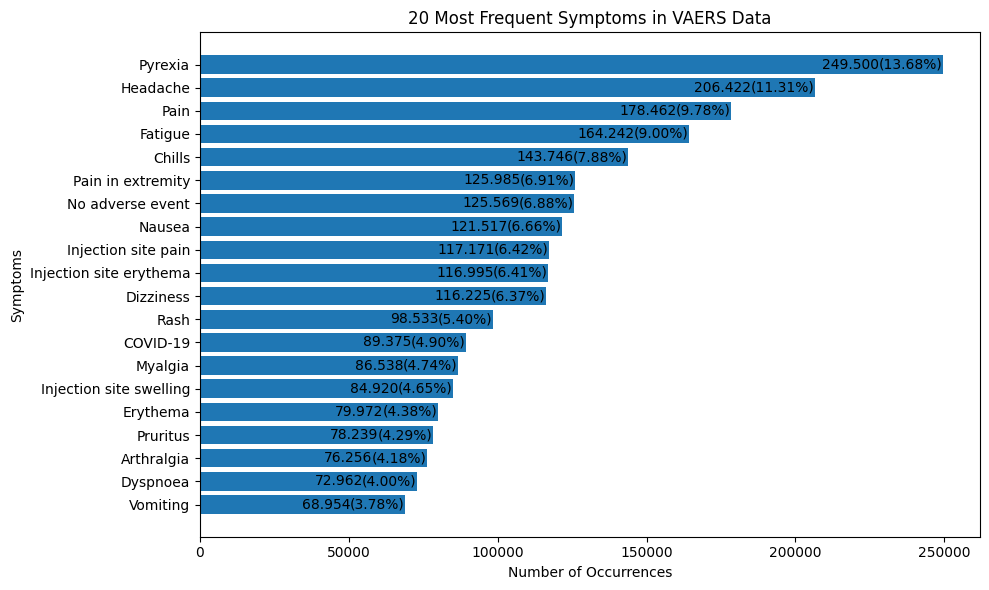

In [2]:
# Query the database for all documents
cursor = collection.find({})

# Initialize a Counter object to count symptoms
symptom_counter = Counter()

# Process documents to count symptoms
for document in cursor:
    # Check if 'symptoms' is in the document and is a list
    if 'symptoms' in document and isinstance(document['symptoms'], list):
        symptom_counter.update(document['symptoms'])
        
# Get the total count of all symptoms
total_reports = collection.count_documents({})


# Get the 20 most common symptoms
most_common_symptoms = symptom_counter.most_common(20)

# Extract symptoms and counts for plotting
symptoms, counts = zip(*most_common_symptoms)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(symptoms, counts)

for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / total_reports) * 100
    if bar.get_width() > 200000:
        total_offset = -40500
        percent_offset = -21500
    elif bar.get_width() > 100000:
        total_offset = -37500
        percent_offset = -18500
    else:
        total_offset = -34500
        percent_offset = -18500
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')

# Set titles and labels
plt.title('20 Most Frequent Symptoms in VAERS Data')
plt.xlabel('Number of Occurrences')
plt.ylabel('Symptoms')

# Invert y-axis to have the most common symptom at the top
plt.gca().invert_yaxis()

plt.tight_layout()

# Save the plot
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_alltime.png')

plt.show()

In [271]:
symptom_counter

Counter({'Pyrexia': 249500,
         'Headache': 206422,
         'Pain': 178462,
         'Fatigue': 164242,
         'Chills': 143746,
         'Pain in extremity': 125985,
         'No adverse event': 125569,
         'Nausea': 121517,
         'Injection site pain': 117171,
         'Injection site erythema': 116995,
         'Dizziness': 116225,
         'Rash': 98533,
         'COVID-19': 89375,
         'Myalgia': 86538,
         'Injection site swelling': 84920,
         'Erythema': 79972,
         'Pruritus': 78239,
         'Arthralgia': 76256,
         'Dyspnoea': 72962,
         'Vomiting': 68954,
         'Product storage error': 61910,
         'Urticaria': 61555,
         'SARS-CoV-2 test positive': 59595,
         'Asthenia': 59281,
         'Expired product administered': 54114,
         'Cough': 50838,
         'Injection site warmth': 49711,
         'Malaise': 49517,
         'Diarrhoea': 47813,
         'Paraesthesia': 42140,
         'Hypoaesthesia': 37449,
      

# Now for people that got vaccinated with the COVID-19 vaccine

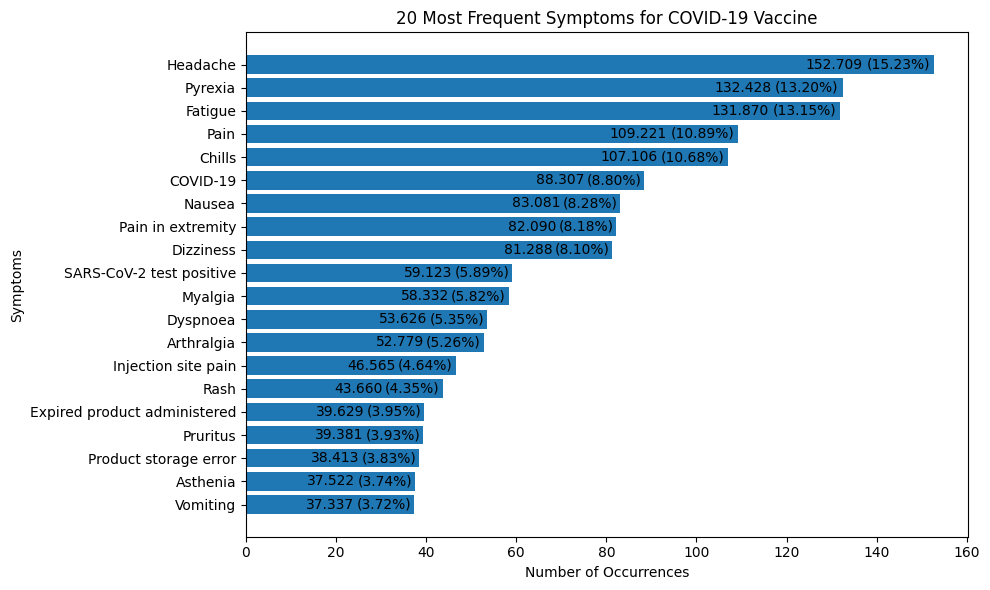

In [272]:
# Regex pattern to match any form of "COVID" followed by any characters in vax_type
covid_pattern = re.compile(r'COVID', re.IGNORECASE)

# Query the database for documents with "COVID" in the vax_type field within the vax_data array
query = {'vax_data.VAX_TYPE': covid_pattern}
covid_documents_cursor = collection.find(query)

# Initialize a Counter object to count symptoms
symptom_counter = Counter()

# Get the total number of documents that match the query
covid_document_count = collection.count_documents(query)

# Check if there are any documents that match the COVID query
if covid_document_count == 0:
    raise ValueError("No documents found with COVID vaccine in the data.")

# Process documents to count symptoms
for document in covid_documents_cursor:
    # Check if 'symptoms' exists and is a list (iterable)
    if 'symptoms' in document and isinstance(document['symptoms'], list):
        symptom_counter.update(document['symptoms'])

# Check if there are any symptoms to process
if not symptom_counter:
    raise ValueError("No symptoms found for COVID vaccines in the data.")



# Get the 20 most common symptoms
most_common_symptoms = symptom_counter.most_common(20)

# Extract symptoms and counts for plotting
symptoms, counts = zip(*most_common_symptoms)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(symptoms, counts)

# Set titles and labels
plt.title('20 Most Frequent Symptoms for COVID-19 Vaccine')
plt.xlabel('Number of Occurrences')
plt.ylabel('Symptoms')

# Define a custom formatter function to display x-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}'

# Set the custom formatter for the x-axis
plt.gca().xaxis.set_major_formatter(thousands_formatter)

# Add data labels and percentages to the bars
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / covid_document_count) * 100
    if bar.get_width() > 100000:
        total_offset = -28500
        percent_offset = -15000
    else:
        total_offset = -24000
        percent_offset = -12750
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')
    

# Invert y-axis to have the most common symptom at the top
plt.gca().invert_yaxis()

plt.tight_layout()

# Save the plot
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_COVID.png')
plt.show()

# Now for every other vaccine besides COVID-19

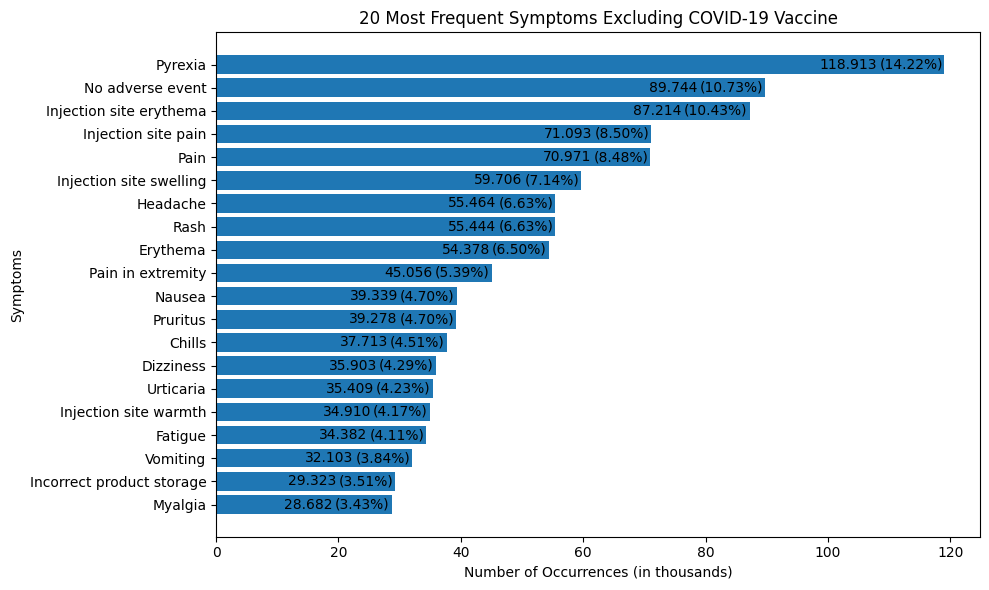

In [273]:
# Regex pattern to match any characters except "COVID" in vax_type
non_covid_pattern = re.compile(r'^(?!.*COVID).*$', re.IGNORECASE)

# Query the database for documents with "COVID" in the vax_type field within the vax_data array
query = {'vax_data.VAX_TYPE': non_covid_pattern}
non_covid_documents_cursor = collection.find(query)

# Initialize a Counter object to count symptoms
symptom_counter = Counter()

# Get the total number of documents that match the query
non_covid_document_count = collection.count_documents(query)

# Check if there are any documents that match the COVID query
if non_covid_document_count == 0:
    raise ValueError("No documents found with COVID vaccine in the data.")

# Process documents to count symptoms
for document in non_covid_documents_cursor:
    # Check if 'symptoms' exists and is a list (iterable)
    if 'symptoms' in document and isinstance(document['symptoms'], list):
        symptom_counter.update(document['symptoms'])

# Check if there are any symptoms to process
if not symptom_counter:
    raise ValueError("No symptoms found for COVID vaccines in the data.")



# Get the 20 most common symptoms
most_common_symptoms = symptom_counter.most_common(20)

# Extract symptoms and counts for plotting
symptoms, counts = zip(*most_common_symptoms)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(symptoms, counts)

# Set titles and labels
plt.title('20 Most Frequent Symptoms Excluding COVID-19 Vaccine')
plt.xlabel('Number of Occurrences (in thousands)')
plt.ylabel('Symptoms')

# Define a custom formatter function to display x-axis labels in thousands
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}'

# Set the custom formatter for the x-axis
plt.gca().xaxis.set_major_formatter(thousands_formatter)

# Add data labels and percentages to the bars
for bar in bars:
    label = f'{bar.get_width():,.0f}'.replace(',', '.')  # Format the number with a dot as a thousands separator
    percentage = (bar.get_width() / non_covid_document_count) * 100
    if bar.get_width() > 100000:
        total_offset = -20250
        percent_offset = -10500
    elif bar.get_width() > 80000:
        total_offset = -19000
        percent_offset = -10750
    else:
        total_offset = -17500
        percent_offset = -9250
    
    x_position = bar.get_width()
    plt.text(x_position + total_offset, bar.get_y() + bar.get_height() / 2,
             label,
             va='center', ha='left', color='black')
    
    # Add percentage next to the total number
    plt.text(x_position + percent_offset, bar.get_y() + bar.get_height() / 2,
             f'({percentage:.2f}%)',
             va='center', ha='left', color='black')
    

# Invert y-axis to have the most common symptom at the top
plt.gca().invert_yaxis()

plt.tight_layout()

# Save the plot
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_ExcludingCOVID.png')
plt.show()

# Symptoms per manufacturer

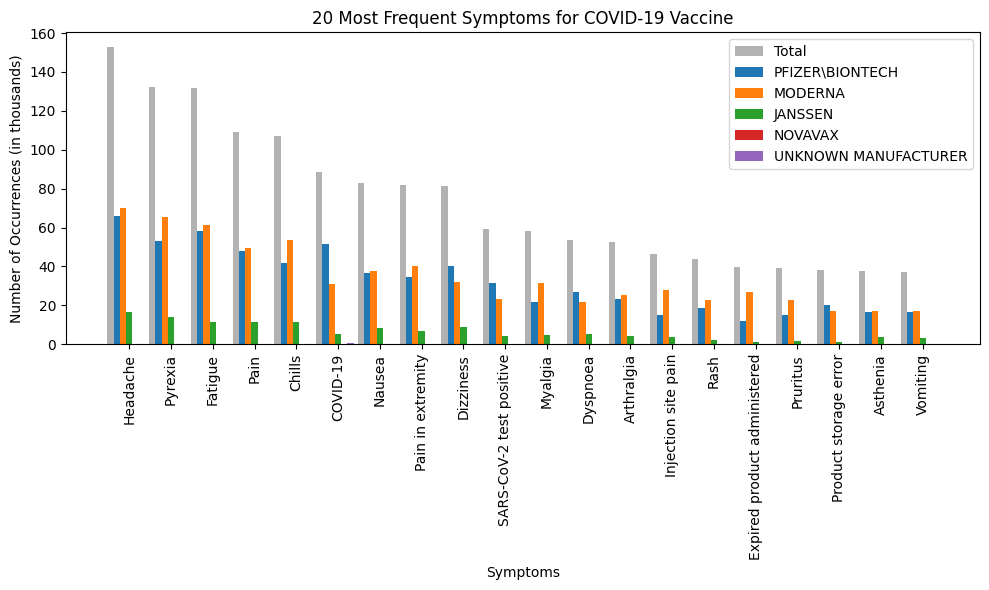

In [274]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the manufacturers to include
target_manufacturers = ['PFIZER\\BIONTECH', 'MODERNA', 'JANSSEN', 'NOVAVAX', 'UNKNOWN MANUFACTURER']

# Initialize a dictionary to store symptoms per manufacturer
symptoms_per_manufacturer = {manu: {} for manu in target_manufacturers}

# Query the database for documents with specified manufacturers and VAX_TYPE including 'COVID'
query = {
    'vax_data.VAX_MANU': {'$in': target_manufacturers},
    'vax_data.VAX_TYPE': {'$regex': 'COVID', '$options': 'i'}
}
projection = {'VAERS_ID': True, 'vax_data.VAX_MANU': True, 'symptoms': True}
documents_cursor = collection.find(query, projection)

# Process documents to count symptoms
for document in documents_cursor:
    # Extract all VAX_MANU entries for the document
    manufacturers = [entry['VAX_MANU'] for entry in document.get('vax_data', []) if 'VAX_MANU' in entry]

    # Intersect the manufacturers list with the target manufacturers
    intersected_manufacturers = set(manufacturers).intersection(set(target_manufacturers))

    # If there's no intersection, skip this document
    if not intersected_manufacturers:
        continue
    
    # Assume that a document cannot have more than one vaccine manufacturer from the target list
    manufacturer = intersected_manufacturers.pop()
    
    # Ensure symptoms_list is always a list
    symptoms_list = document.get('symptoms', [])
    if not isinstance(symptoms_list, list):
        symptoms_list = [symptoms_list]  # Convert to list if not already
    
    for symptom in symptoms_list:
        if symptom:  # Check if symptom is not empty
            symptoms_per_manufacturer[manufacturer].setdefault(symptom, 0)
            symptoms_per_manufacturer[manufacturer][symptom] += 1

# Convert the dictionary to DataFrame
df = pd.DataFrame(symptoms_per_manufacturer).fillna(0)

# Sum the counts of each symptom across all manufacturers
df['Total'] = df.sum(axis=1)

# Select the top 20 most frequent symptoms
top_20_symptoms = df['Total'].sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.15
index = range(len(top_20_symptoms))

# Calculate total counts for top 20 symptoms
total_counts = df['Total'][top_20_symptoms.index]

# Plot total bar first
plt.bar(index, total_counts, width=bar_width, label='Total', color='k', alpha=0.3)

# Plot bars for individual manufacturers
for i, manufacturer in enumerate(target_manufacturers):
    if manufacturer in df.columns:
        symptom_counts = [df.at[symptom, manufacturer] for symptom in top_20_symptoms.index]
        plt.bar([x + bar_width * (i + 1) for x in index], symptom_counts, width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Number of Occurrences (in thousands)')
plt.title('20 Most Frequent Symptoms for COVID-19 Vaccine')
plt.xticks([x + bar_width * (len(target_manufacturers) + 1) / 2 for x in index], top_20_symptoms.index, rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend

# Define custom formatter function for y-axis
def thousands_formatter(x, pos):
    return f'{x/1000:.0f}'

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(thousands_formatter)

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_COVID_byManufacturer_total.png')
plt.show()

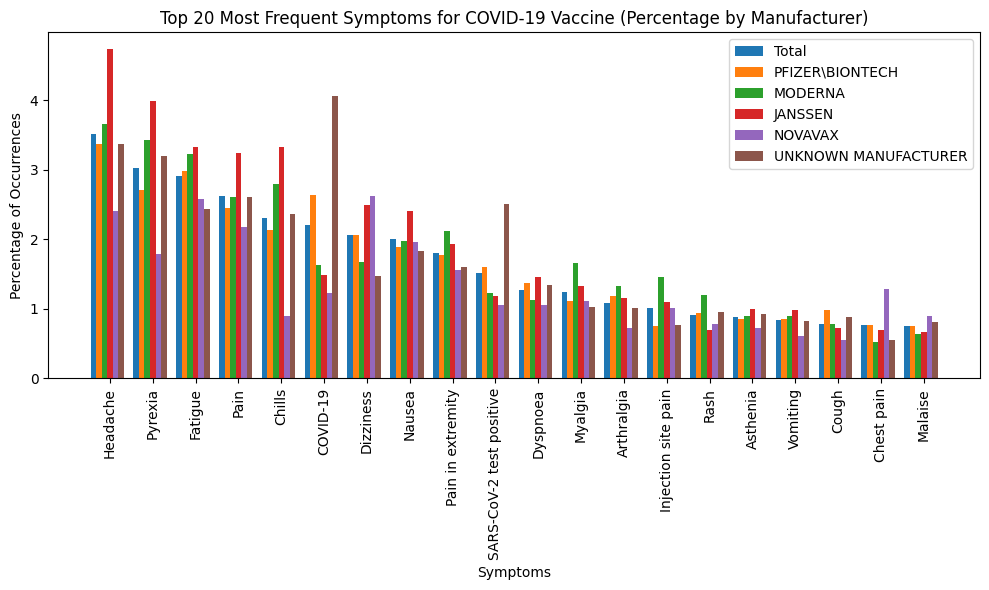

In [277]:
# Specify the manufacturers to include
target_manufacturers = ['PFIZER\\BIONTECH', 'MODERNA', 'JANSSEN', 'NOVAVAX', 'UNKNOWN MANUFACTURER']

# Initialize a dictionary to store symptoms per manufacturer
symptoms_per_manufacturer = {manu: {} for manu in target_manufacturers}

# Query the database for documents with specified manufacturers and VAX_TYPE including 'COVID'
query = {
    'vax_data.VAX_MANU': {'$in': target_manufacturers},
    'vax_data.VAX_TYPE': {'$regex': 'COVID', '$options': 'i'}
}
projection = {'VAERS_ID': True, 'vax_data.VAX_MANU': True, 'symptoms': True}
documents_cursor = collection.find(query, projection)

# Process documents to count symptoms
for document in documents_cursor:
    # Extract all VAX_MANU entries for the document
    manufacturers = [entry['VAX_MANU'] for entry in document.get('vax_data', []) if 'VAX_MANU' in entry]

    # Intersect the manufacturers list with the target manufacturers
    intersected_manufacturers = set(manufacturers).intersection(set(target_manufacturers))

    # If there's no intersection, skip this document
    if not intersected_manufacturers:
        continue
    
    # Assume that a document cannot have more than one vaccine manufacturer from the target list
    manufacturer = intersected_manufacturers.pop()
    
    # Ensure symptoms_list is always a list
    symptoms_list = document.get('symptoms', [])
    if not isinstance(symptoms_list, list):
        symptoms_list = [symptoms_list]  # Convert to list if not already
    
    for symptom in symptoms_list:
        if symptom:  # Check if symptom is not empty
            symptoms_per_manufacturer[manufacturer].setdefault(symptom, 0)
            symptoms_per_manufacturer[manufacturer][symptom] += 1

# Convert the dictionary to DataFrame
df = pd.DataFrame(symptoms_per_manufacturer).fillna(0)

# Calculate the total number of symptoms per manufacturer
total_symptoms_per_manufacturer = df.sum(axis=0)

# Calculate the percentage of each symptom for each manufacturer
for manufacturer in target_manufacturers:
    if manufacturer in df.columns:
        df[manufacturer] = df[manufacturer] / total_symptoms_per_manufacturer[manufacturer] * 100

# Select the top 20 most frequent symptoms
top_20_symptoms = df.sum(axis=1).nlargest(20)

# Define the order of manufacturers for plotting
plot_order = ['Total'] + target_manufacturers

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.13
index = range(len(top_20_symptoms))

# Calculate and plot the total bar first
total_percentages = df.sum(axis=1) / len(target_manufacturers)
plt.bar(index, total_percentages.loc[top_20_symptoms.index], width=bar_width, label='Total')

# Plot bars for individual manufacturers
for i, manufacturer in enumerate(target_manufacturers):
    if manufacturer in df.columns:
        symptom_percentages = [df.at[symptom, manufacturer] for symptom in top_20_symptoms.index]
        plt.bar([x + bar_width * (i + 1) for x in index], symptom_percentages, width=bar_width, label=manufacturer)

# Adding labels and title
plt.xlabel('Symptoms')
plt.ylabel('Percentage of Occurrences')
plt.title('Top 20 Most Frequent Symptoms for COVID-19 Vaccine (Percentage by Manufacturer)')
plt.xticks([x + bar_width * len(plot_order) / 2 for x in index], top_20_symptoms.index, rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend

plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Symptoms/Top20Symptoms_COVID_byManufacturer.png')
plt.show()